baksi, lannan



Populating the interactive namespace from numpy and matplotlib


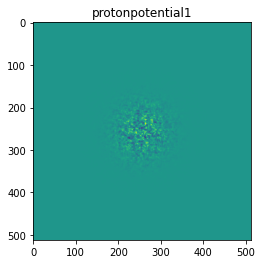

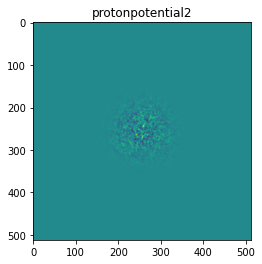

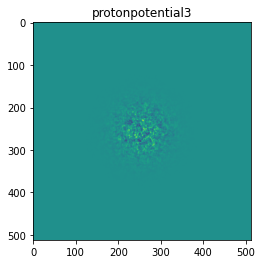

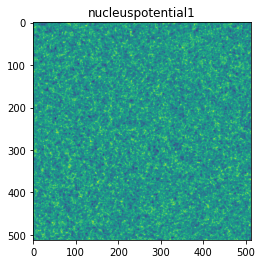

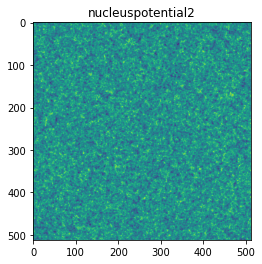

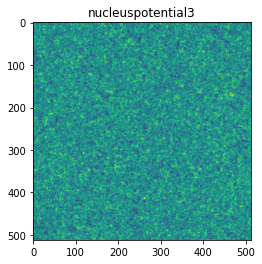

In [ ]:
%pylab inline
N = 2**9
mu = .5
delta = .05 #stepsize
sigma = mu / delta
Rp = 2
L = delta*N

#creating all the potentials#
def chargeToPotential(charge):
  fftpotential = zeros((N, N), complex)
  fftcharge = np.fft.fft2(charge,norm="ortho")
  for n  in range(N):
    for m in range(N):
      fftpotential[n,m] = -2 * delta**2 * np.pi * fftcharge[n,m] / ( cos(2*np.pi*n/N) + cos(2*np.pi*m/N) -2 - mu/2 )
  return np.real(np.fft.fft2(fftpotential,norm="ortho"))

def protonchargedensity(x,y):
  return np.exp(-((x-N*delta/2)**2 +(y-N*delta/2)**2)/2/Rp**2) * np.random.normal(scale=sigma)

def nucleuschargedensity(x,y):
  return np.random.normal(scale=sigma)

protoncharge1 = np.zeros([N,N])
for i in range(N):
  for j in range(N):
    protoncharge1[i,j] = protonchargedensity(i*delta,j*delta)
protonpotential1 = chargeToPotential(protoncharge1)
plt.imshow(protonpotential1)
plt.title("protonpotential1")
plt.show()

protoncharge2 = np.zeros([N,N])
for i in range(N):
  for j in range(N):
    protoncharge2[i,j] = protonchargedensity(i*delta,j*delta)
protonpotential2 = chargeToPotential(protoncharge2)
plt.imshow(protonpotential2)
plt.title("protonpotential2")
plt.show()

protoncharge3 = np.zeros([N,N]) #for 3 colors cus why not
for i in range(N):
  for j in range(N):
    protoncharge2[i,j] = protonchargedensity(i*delta,j*delta)
protonpotential3 = chargeToPotential(protoncharge2)
plt.imshow(protonpotential3)
plt.title("protonpotential3")
plt.show()

nucleuscharge1 = np.zeros([N,N])
for i in range(N):
  for j in range(N):
    nucleuscharge1[i,j] = nucleuschargedensity(i,j)
nucleuspotential1 = chargeToPotential(nucleuscharge1)
plt.imshow(nucleuspotential1)
plt.title("nucleuspotential1")
plt.show()

nucleuscharge2 = np.zeros([N,N])
for i in range(N):
  for j in range(N):
    nucleuscharge2[i,j] = nucleuschargedensity(i,j)
nucleuspotential2 = chargeToPotential(nucleuscharge2)
plt.imshow(nucleuspotential2)
plt.title("nucleuspotential2")
plt.show()

nucleuscharge3 = np.zeros([N,N])
for i in range(N):
  for j in range(N):
    nucleuscharge3[i,j] = nucleuschargedensity(i,j)
nucleuspotential3 = chargeToPotential(nucleuscharge2)
plt.imshow(nucleuspotential3)
plt.title("nucleuspotential3")
plt.show()

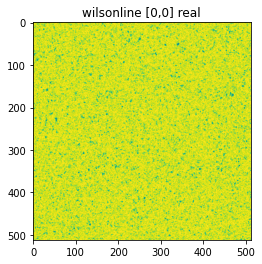

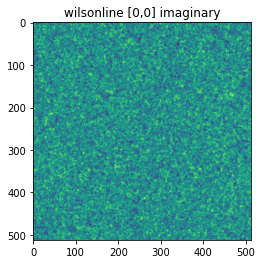

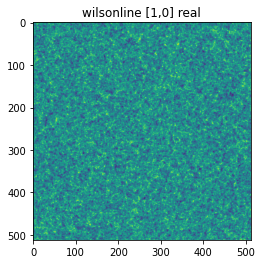

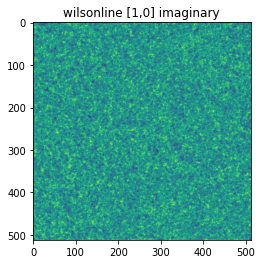

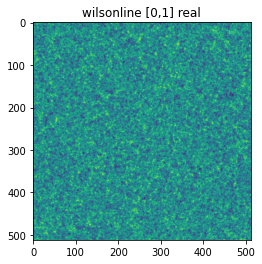

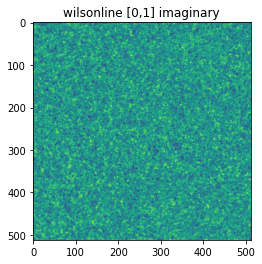

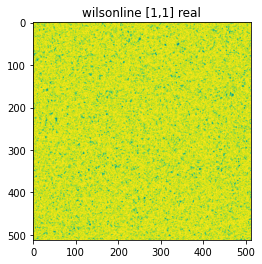

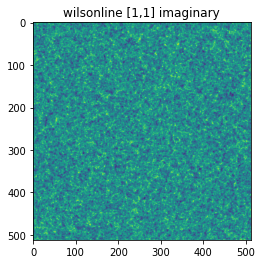

In [ ]:
g=1
#generate wilson line for the nucleus#


def pauli(n):
    if n==0: return np.matrix([[1, 0], [0, 1]], dtype=complex)
    if n==1: return np.matrix([[0, 1], [1, 0]], dtype=complex)
    if n==2: return np.matrix([[0, 1j], [1j, 0]], dtype=complex)
    if n==3: return np.matrix([[1, 0], [0, -1]], dtype=complex)

wilsonline = np.zeros((N,N,2,2), dtype=complex)
for i in range(N):
  for j in range(N):
    #wilsonline[i,j,:,:] = np.identity(2,dtype=complex)*np.cos(np.a*nucleuspotential1[i,j]*pauli(1) + np.exp(-1j*g*nucleuspotential2[i,j]*pauli(2))  + np.exp(-1j*g*nucleuspotential3[i,j]*pauli(3)) #this is 6.85
    norm = np.sqrt(nucleuspotential1[i,j]**2 + nucleuspotential2[i,j]**2 + nucleuspotential3[i,j]**2)
    asig = nucleuspotential1[i,j]*pauli(1)+ nucleuspotential2[i,j]*pauli(2) + nucleuspotential3[i,j]*pauli(3)
    wilsonline[i,j,:,:] = pauli(0)*np.cos(norm) + 1j*asig/norm *sin(norm)
#print(wilsonline)

plt.imshow(np.real(wilsonline[:,:,0,0]))
plt.title("wilsonline [0,0] real")
plt.show()
plt.imshow(np.imag(wilsonline[:,:,0,0]))
plt.title("wilsonline [0,0] imaginary")
plt.show()

plt.imshow(np.real(wilsonline[:,:,1,0]))
plt.title("wilsonline [1,0] real")
plt.show()
plt.imshow(np.imag(wilsonline[:,:,1,0]))
plt.title("wilsonline [1,0] imaginary")
plt.show()

plt.imshow(np.real(wilsonline[:,:,0,1]))
plt.title("wilsonline [0,1] real")
plt.show()
plt.imshow(np.imag(wilsonline[:,:,0,1]))
plt.title("wilsonline [0,1] imaginary")
plt.show()

plt.imshow(np.real(wilsonline[:,:,1,1]))
plt.title("wilsonline [1,1] real")
plt.show()
plt.imshow(np.imag(wilsonline[:,:,1,1]))
plt.title("wilsonline [1,1] imaginary")
plt.show()


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  9.92711124e-01  6.93889390e-18 -3.71845415e-03]
 [ 0.00000000e+00  6.93889390e-18 -9.92711124e-01  0.00000000e+00]
 [ 0.00000000e+00 -3.71845415e-03 -1.73472348e-18  9.90814137e-01]]


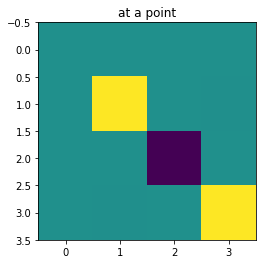

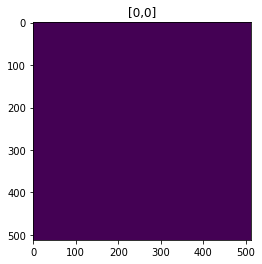

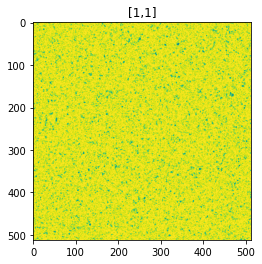

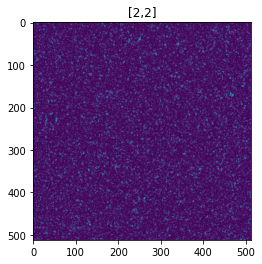

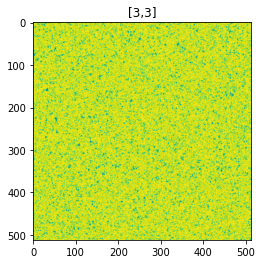

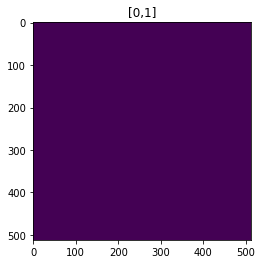

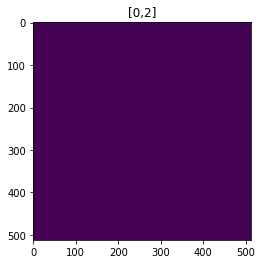

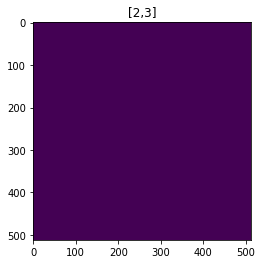

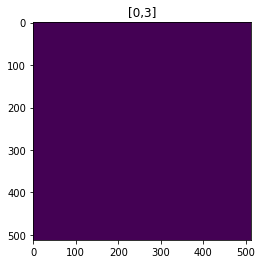

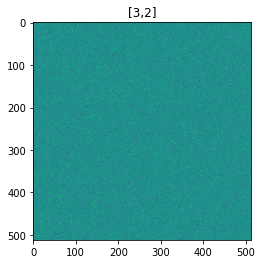

In [ ]:
adwilson= np.zeros((N,N,4,4))
adwilson[:,:,0,0]=1
adwilson[:,:,:,0]=0
adwilson[:,:,0,:]=0

for i in range(N):
  for j in range(N):
    for a in (1,2,3):
      for b in (1,2,3):
        wilsonpoint = wilsonline[i,j,:,:]
        #print(wilsonpoint)
        first = np.matmul(pauli(a), wilsonpoint )
        second = np.matmul(pauli(b), np.conj(np.transpose(wilsonpoint)))
        adwilson[i,j,a,b] = np.real(.5* np.trace( np.matmul(first,second)))
print(adwilson[int(N/2),int(N/2),:,:])

plt.imshow(adwilson[int(N/2),int(N/2),:,:])
plt.title("at a point")
plt.show()

plt.imshow(adwilson[:,:,0,0])
plt.title("[0,0]")
plt.show()

plt.imshow(adwilson[:,:,1,1])
plt.title("[1,1]")
plt.show()

plt.imshow(adwilson[:,:,2,2])
plt.title("[2,2]")
plt.show()

plt.imshow(adwilson[:,:,3,3])
plt.title("[3,3]")
plt.show()

plt.imshow(adwilson[:,:,0,1])
plt.title("[0,1]")
plt.show()

plt.imshow(adwilson[:,:,0,2])
plt.title("[0,2]")
plt.show()

plt.imshow(adwilson[:,:,2,3])
plt.title("[2,3]")
plt.show()

plt.imshow(adwilson[:,:,0,3])
plt.title("[0,3]")
plt.show()

plt.imshow(adwilson[:,:,3,2])
plt.title("[3,2]")
plt.show()

In [ ]:
dU = np.zeros((N,N,2,4,4))
for j in (0,1):
  for a in (1,2,3):
    for b in (1,2,3):
      dU[:,:,j,a,b] = np.gradient(adwilson[:,:,a,b], axis=j)

protonpotential = np.zeros((N,N,3))
protonpotential[:,:,0] = protonpotential1
protonpotential[:,:,1] = protonpotential2
protonpotential[:,:,2] = protonpotential3

dA = np.zeros((N,N,2,4))
for i in (0,1):
    for b in range(2):
      dA[:,:,i,b] = np.gradient(protonpotential[:,:,b], axis=i)
print(dA)

[[[[ 6.56197514e-18  4.93202567e-18  0.00000000e+00  0.00000000e+00]
   [ 4.33003244e-18  7.18622753e-18  0.00000000e+00  0.00000000e+00]]

  [[ 3.60802961e-18  6.29996112e-18  0.00000000e+00  0.00000000e+00]
   [ 9.19030748e-19  2.36152786e-18  0.00000000e+00  0.00000000e+00]]

  [[ 1.40221449e-18  4.14439992e-18  0.00000000e+00  0.00000000e+00]
   [-3.46605882e-18  2.81214945e-19  0.00000000e+00  0.00000000e+00]]

  ...

  [[ 2.38246834e-18  6.53121924e-18  0.00000000e+00  0.00000000e+00]
   [-1.97782193e-18  9.71546788e-19  0.00000000e+00  0.00000000e+00]]

  [[-2.89496549e-18  1.84451616e-18  0.00000000e+00  0.00000000e+00]
   [-3.15519773e-19 -1.12507152e-18  0.00000000e+00  0.00000000e+00]]

  [[ 8.29878721e-19 -1.10294929e-18  0.00000000e+00  0.00000000e+00]
   [ 5.09913838e-18  1.50644810e-18  0.00000000e+00  0.00000000e+00]]]


 [[[ 3.80807599e-18  1.16892254e-18  0.00000000e+00  0.00000000e+00]
   [ 1.37608690e-18  8.55416298e-18  0.00000000e+00  0.00000000e+00]]

  [[ 3.1555

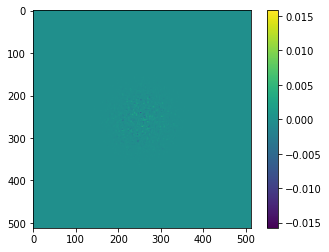

In [ ]:
import sympy
omega = np.zeros((N,N,2,2,4),dtype=complex)

for x in range(N):
  for y in range(N):
    for i in range(1):
      for j in range(1):
        for a in range(3):
          omega[x,y,i,j,a] = np.sum(dA[x,y,i,:]*dU[x,y,j,a,:])

#sympy.pprint(omega)
plt.imshow(np.real(omega[:,:,0,0,1]))
plt.colorbar()

In [ ]:
ftomega = np.zeros((N,N,2,2,4),dtype=complex)
for i in (0,1):
  for j in (0,1):
    for a in (0,1,2,3):
      ftomega[:,:,i,j,a] = np.fft.fft2(omega[:,:,i,j,a],norm="ortho")
print(ftomega)


[[[[[ 0.00000000e+00+0.00000000e+00j -1.47086308e-04+0.00000000e+00j
      6.33646816e-20+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
    [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
      0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]]

   [[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
      0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
    [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
      0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]]]


  [[[ 0.00000000e+00+0.00000000e+00j  1.37395967e-04+1.25586821e-04j
     -5.66812480e-20+2.87902209e-20j  0.00000000e+00+0.00000000e+00j]
    [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
      0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]]

   [[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
      0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
    [ 0.00000000e+0

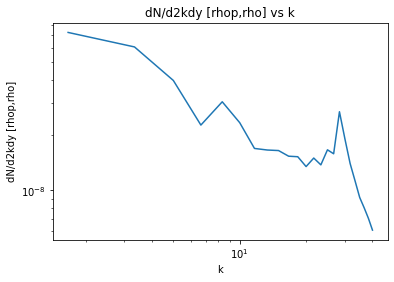

In [ ]:
ks = []
for kx in range(N):
    for ky in range(N):
       k=np.absolute(np.sqrt( ((kx-(N/2-0.5))**2 + (ky-(N/2-0.5))**2)))
       ks.append(k)

dNdKs = [] #storage for final dNdKs
kdN = [] #storage for values of k corresponding to the dNdKs

#print("kmax: ",kmax)
ks = np.zeros((N,N)) #this matrix will store the conversion from real space to k space

for x in range(N):
  for y in range(N):
    #ks[x,y] = np.sqrt((2/delta**2*( (np.sin((x - N/2)/L/delta*2*np.pi))**2 + (np.sin((y - N/2)/L/delta*2*np.pi))**2 ))) #gives k from a lattice point. we need to bin the lattice points in some ring in k space, it seems there are multiple periods over the lattice
    ks[x,y] = np.sqrt((2/delta**2*( (np.sin((x)/N/delta*2*np.pi))**2 + (np.sin((y)/N/delta*2*np.pi))**2 ))) #doesnt seem to make much difference
kmax = np.amax(ks)
radprev = 0
for rad in  np.linspace(0, kmax, num=25): #iterates through radii, num defines the step size
  interdNdK = 0 #intermediate dNdK
  for (x, y), k in np.ndenumerate(ks):
#    print("k:",k,", rad:",rad,", radprev:", radprev)
    if k < rad and k > radprev:
#      print("k:",k,", rad:",rad,", radprev:", radprev)
      for i in (0,1):
        for j in (0,1):
          for l in (0,1):
            for m in (0,1):
              if i == j and l==m:
                interdNdK = interdNdK + np.real(np.sum(ftomega[x,y,i,j,:]*np.conjugate(ftomega[x,y,l,m,:]))/rad**2)
              interdNdK = interdNdK + (j-i)*(m-l)*np.real(np.sum(ftomega[x,y,i,j,:]*np.conjugate(ftomega[x,y,l,m,:]))/rad**2)

  dNdKs.append((1/4/np.pi**3)*interdNdK)
  kdN.append(rad)
  radprev = rad

#print(dNdKs)

plt.plot(kdN[1:],dNdKs[1:])
plt.title("dN/d2kdy [rhop,rho] vs k")
plt.xlabel("k")
plt.ylabel("dN/d2kdy [rhop,rho]")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [ ]:
#extra credit, multiple runs averaged

%pylab inline
N = 2**7
mu = .5
delta = .1 #stepsize
sigma = mu / delta
Rp = 2
L = N*delta

runs = 5 #set the number of runs to average over

dNdKs = [] #storage for final dNdKs
kdN = [] #storage for values of k corresponding to the dNdKs

for run in range(runs):
  print("run: ", run)
  #creating all the potentials#
  def chargeToPotential(charge):
    fftpotential = zeros((N, N), complex)
    fftcharge = np.fft.fft2(charge,norm="ortho")
    for n  in range(N):
      for m in range(N):
        fftpotential[n,m] = -2 * delta**2 * np.pi * fftcharge[n,m] / ( cos(2*np.pi*n/N) + cos(2*np.pi*m/N) -2 - mu/2 )
    return np.real(np.fft.fft2(fftpotential,norm="ortho"))

  def protonchargedensity(x,y):
    return np.exp(-((x-N*delta/2)**2 +(y-N*delta/2)**2)/2/Rp**2) * np.random.normal(scale=sigma)

  def nucleuschargedensity(x,y):
    return np.random.normal(scale=sigma)

  protoncharge1 = np.zeros([N,N])
  for i in range(N):
    for j in range(N):
      protoncharge1[i,j] = protonchargedensity(i*delta,j*delta)
  protonpotential1 = chargeToPotential(protoncharge1)

  protoncharge2 = np.zeros([N,N])
  for i in range(N):
    for j in range(N):
      protoncharge2[i,j] = protonchargedensity(i*delta,j*delta)
  protonpotential2 = chargeToPotential(protoncharge2)

  protoncharge3 = np.zeros([N,N]) #for 3 colors cus why not
  for i in range(N):
    for j in range(N):
      protoncharge2[i,j] = protonchargedensity(i*delta,j*delta)
  protonpotential3 = chargeToPotential(protoncharge2)

  nucleuscharge1 = np.zeros([N,N])
  for i in range(N):
    for j in range(N):
      nucleuscharge1[i,j] = nucleuschargedensity(i,j)
  nucleuspotential1 = chargeToPotential(nucleuscharge1)

  nucleuscharge2 = np.zeros([N,N])
  for i in range(N):
    for j in range(N):
      nucleuscharge2[i,j] = nucleuschargedensity(i,j)
  nucleuspotential2 = chargeToPotential(nucleuscharge2)

  nucleuscharge3 = np.zeros([N,N])
  for i in range(N):
    for j in range(N):
      nucleuscharge3[i,j] = nucleuschargedensity(i,j)
  nucleuspotential3 = chargeToPotential(nucleuscharge2)


  g=1
  #generate wilson line for the nucleus#
  def pauli(n):
      if n==0: return np.matrix([[1, 0], [0, 1]], dtype=complex)
      if n==1: return np.matrix([[0, 1], [1, 0]], dtype=complex)
      if n==2: return np.matrix([[0, 1j], [1j, 0]], dtype=complex)
      if n==3: return np.matrix([[1, 0], [0, -1]], dtype=complex)

  wilsonline = np.zeros((N,N,2,2), dtype=complex)
  for i in range(N):
    for j in range(N):
      #wilsonline[i,j,:,:] = np.identity(2,dtype=complex)*np.cos(np.a*nucleuspotential1[i,j]*pauli(1) + np.exp(-1j*g*nucleuspotential2[i,j]*pauli(2))  + np.exp(-1j*g*nucleuspotential3[i,j]*pauli(3)) #this is 6.85
      norm = np.sqrt(nucleuspotential1[i,j]**2 + nucleuspotential2[i,j]**2 + nucleuspotential3[i,j]**2)
      asig = nucleuspotential1[i,j]*pauli(1)+ nucleuspotential2[i,j]*pauli(2) + nucleuspotential3[i,j]*pauli(3)
      wilsonline[i,j,:,:] = pauli(0)*np.cos(norm) + 1j*asig/norm *sin(norm)

  adwilson= np.zeros((N,N,4,4))
  adwilson[:,:,0,0]=1
  adwilson[:,:,:,0]=0
  adwilson[:,:,0,:]=0

  for i in range(N):
    for j in range(N):
      for a in (1,2,3):
        for b in (1,2,3):
          wilsonpoint = wilsonline[i,j,:,:]
          #print(wilsonpoint)
          first = np.matmul(pauli(a), wilsonpoint )
          second = np.matmul(pauli(b), np.conj(np.transpose(wilsonpoint)))
          adwilson[i,j,a,b] = np.real(.5* np.trace( np.matmul(first,second)))
  #print(adwilson[int(L/2),int(L/2),:,:])

  dU = np.zeros((N,N,2,4,4))
  for j in (0,1):
    for a in (1,2,3):
      for b in (1,2,3):
        dU[:,:,j,a,b] = np.gradient(adwilson[:,:,a,b], axis=j)

  protonpotential = np.zeros((N,N,3))
  protonpotential[:,:,0] = protonpotential1
  protonpotential[:,:,1] = protonpotential2
  protonpotential[:,:,2] = protonpotential3

  dA = np.zeros((N,N,2,4))
  for i in (0,1):
      for b in range(2):
        dA[:,:,i,b] = np.gradient(protonpotential[:,:,b], axis=i)

  omega = np.zeros((N,N,2,2,4),dtype=complex)

  for x in range(N):
    for y in range(N):
      for i in range(1):
        for j in range(1):
          for a in range(3):
            omega[x,y,i,j,a] = np.sum(dA[x,y,i,:]*dU[x,y,j,a,:])

  ftomega = np.zeros((N,N,2,2,4),dtype=complex)
  for i in (0,1):
    for j in (0,1):
      for a in (0,1,2,3):
        ftomega[:,:,i,j,a] = np.fft.fft2(omega[:,:,i,j,a],norm="ortho")

  ks = []
  for kx in range(N):
      for ky in range(N):
        k=np.absolute(np.sqrt((kx-(N/2-0.5))**2 + (ky-(N/2-0.5))**2))
        ks.append(k)


  kmax = 1 #8/delta**2
  #print("kmax: ",kmax)
  ks = np.zeros((N,N)) #this matrix will store the conversion from real space to k space

  for x in range(N):
    for y in range(N):
      ks[x,y] = np.sqrt((2/delta**2*( (np.sin((x - N/2)/N/delta*2*np.pi))**2 + (np.sin((y - N/2)/N/delta*2*np.pi))**2 ))) #gives k from a lattice point. we need to bin the lattice points in some ring in k space, it seems there are multiple periods over the lattice

  kmax = np.amax(ks)
  radprev = 0
  for rad in  np.linspace(0, kmax, num=25): #iterates through radii, num defines the step size
    interdNdK = 0 #intermediate dNdK
    for (x, y), k in np.ndenumerate(ks):
  #    print("k:",k,", rad:",rad,", radprev:", radprev)
      if k < rad and k > radprev:
  #      print("accepted: ","k:",k,", rad:",rad,", radprev:", radprev)
        for i in (0,1):
          for j in (0,1):
            for l in (0,1):
              for m in (0,1):
                if i == j and l==m:
                  interdNdK = interdNdK + np.real(np.sum(ftomega[x,y,i,j,:]*np.conjugate(ftomega[x,y,l,m,:]))/rad**2)
                interdNdK = interdNdK + (j-i)*(m-l)*np.real(np.sum(ftomega[x,y,i,j,:]*np.conjugate(ftomega[x,y,l,m,:]))/rad**2)

    dNdKs.append((1/4/np.pi**3)*interdNdK)
    kdN.append(rad)
    radprev = rad



Populating the interactive namespace from numpy and matplotlib
run:  0


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


run:  1
run:  2
run:  3
run:  4


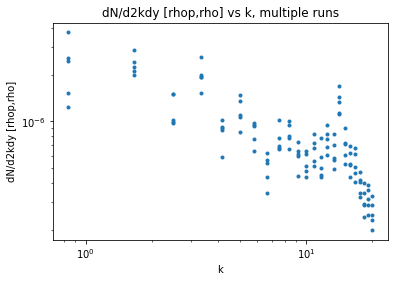

In [ ]:
#plot multiple runs

plt.plot(kdN[1:],dNdKs[1:],".")
plt.title("dN/d2kdy [rhop,rho] vs k, multiple runs")
plt.xlabel("k")
plt.ylabel("dN/d2kdy [rhop,rho]")
plt.xscale("log")
plt.yscale("log")
plt.show()